In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Index(['player_name', 'match_name', 'position', 'team_name',
       'competition_name', 'season_name', 'third', 'channel', 'player_id',
       'player_birthdate', 'match_date', 'minutes_played_per_match',
       'adjusted_min_tip_per_match', 'quality_check',
       'count_coming_short_runs_in_sample',
       'count_coming_short_runs_per_match',
       'count_dangerous_coming_short_runs_per_match',
       'coming_short_runs_threat_per_match',
       'count_coming_short_runs_leading_to_goal_per_match',
       'count_coming_short_runs_targeted_per_match',
       'count_coming_short_runs_received_per_match',
       'count_coming_short_runs_leading_to_shot_per_match',
       'coming_short_runs_targeted_threat_per_match',
       'coming_short_runs_received_threat_per_match',
       'count_dangerous_coming_short_runs_targeted_per_match',
       'count_dangerous_coming_short_runs_received_per_match'],
      dtype='object')


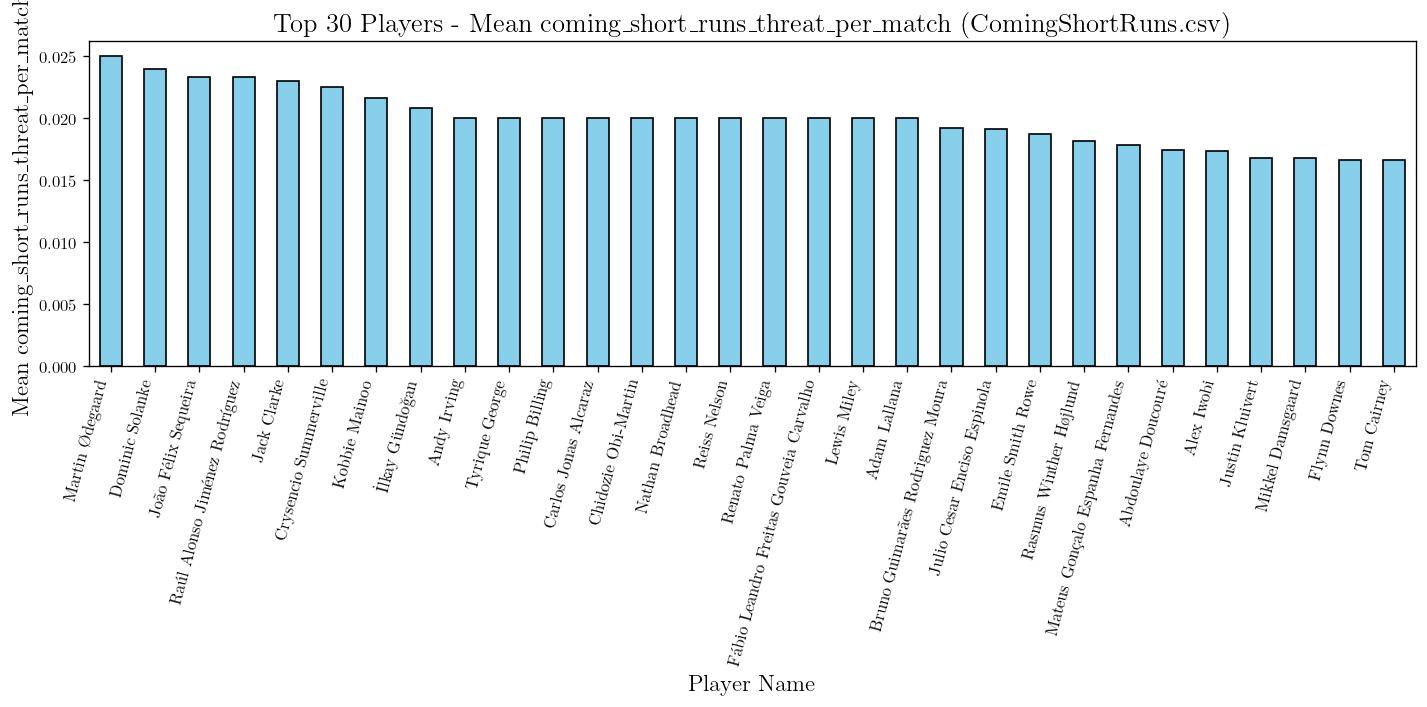

In [8]:
df = pd.read_csv("2024.45/ComingShortRuns.csv", sep=";", quotechar='"')
df.columns = df.columns.str.strip()
print(df.columns)

# Column to average
col_to_plot = "coming_short_runs_threat_per_match"

# Group by player and compute mean
mean_values = (
    df.groupby("player_name")[col_to_plot]
    .mean()
    .sort_values(ascending=False)
    .head(30)  # Top 30
)

# Plot
plt.figure(figsize=(12, 6))
mean_values.plot(kind="bar", color="skyblue", edgecolor="black")

plt.ylabel(f"Mean {col_to_plot}")
plt.xlabel("Player Name")
plt.title(f"Top 30 Players - Mean {col_to_plot} (ComingShortRuns.csv)")
plt.xticks(rotation=75, ha="right")  # Better label readability
plt.tight_layout()
plt.show()


In [ ]:
display(df.head(5))

In [ ]:
print(df.columns)

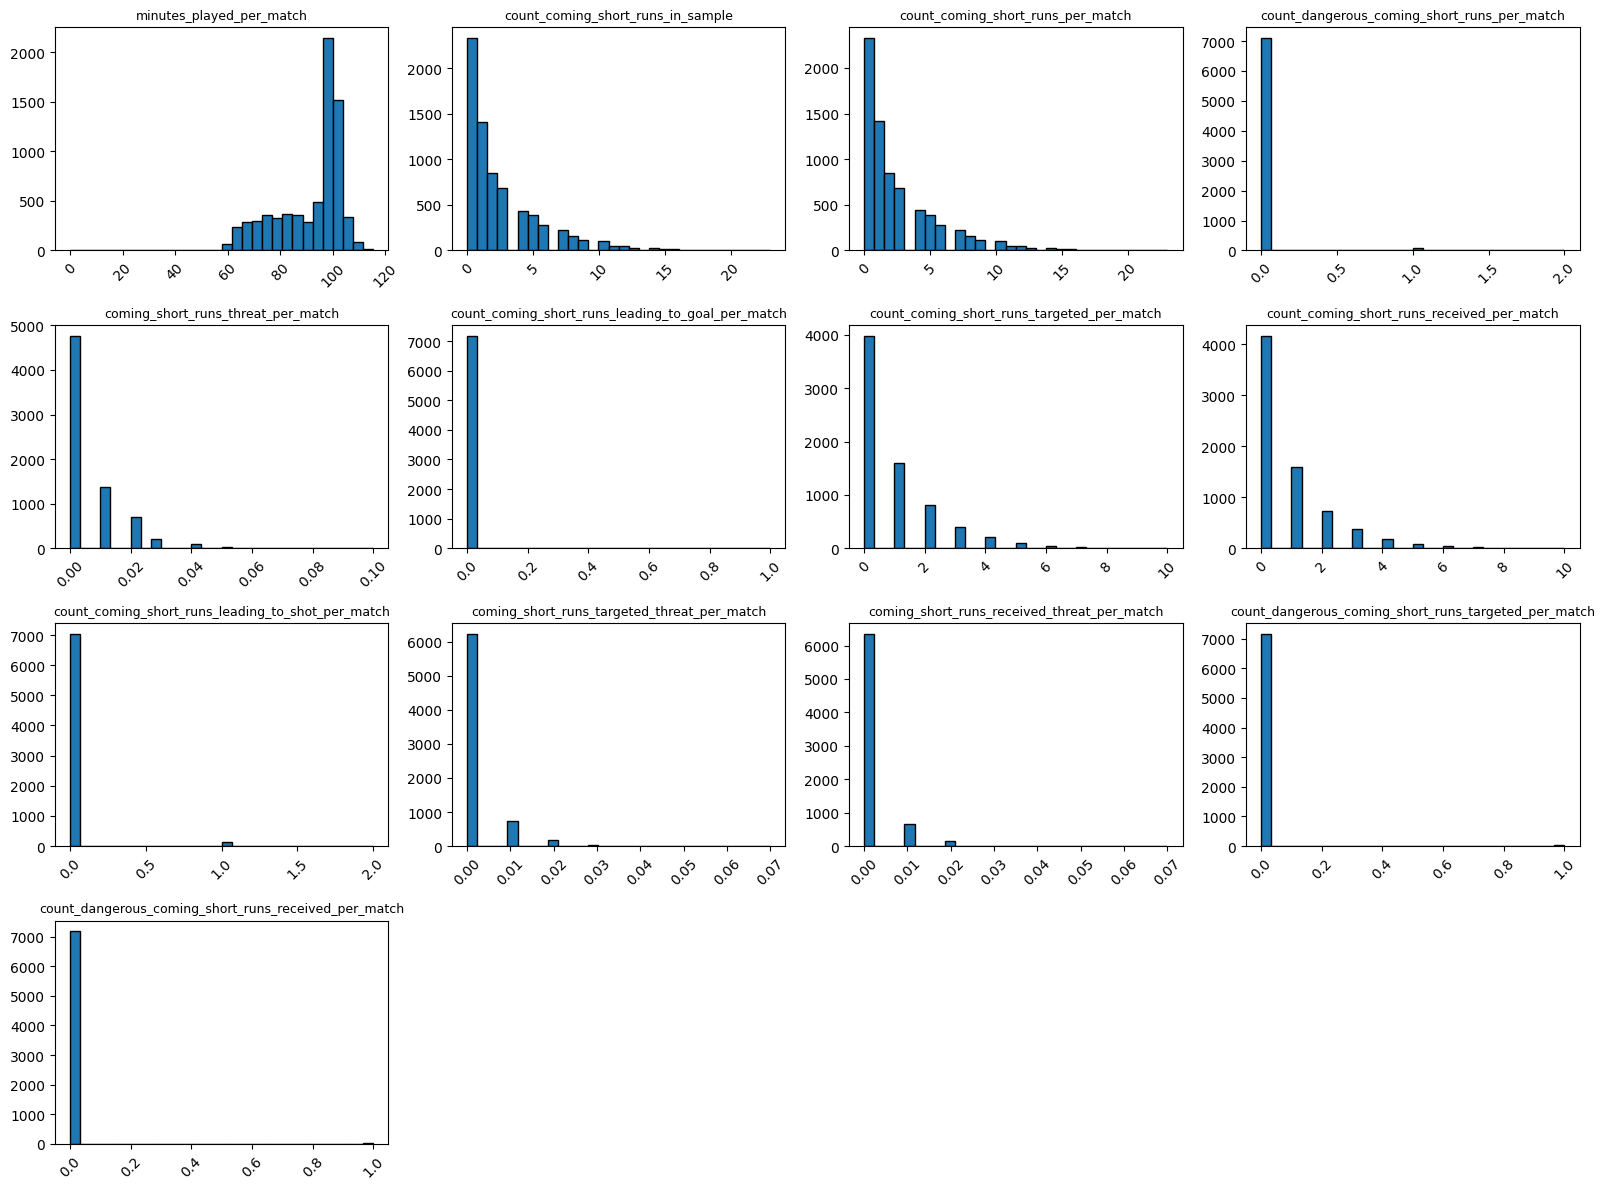

In [3]:
# Columns you want histograms for
cols_to_plot = [
    'minutes_played_per_match',
    'count_coming_short_runs_in_sample',
    'count_coming_short_runs_per_match',
    'count_dangerous_coming_short_runs_per_match',
    'coming_short_runs_threat_per_match',
    'count_coming_short_runs_leading_to_goal_per_match',
    'count_coming_short_runs_targeted_per_match',
    'count_coming_short_runs_received_per_match',
    'count_coming_short_runs_leading_to_shot_per_match',
    'coming_short_runs_targeted_threat_per_match',
    'coming_short_runs_received_threat_per_match',
    'count_dangerous_coming_short_runs_targeted_per_match',
    'count_dangerous_coming_short_runs_received_per_match'
]

# Convert selected columns to numeric
df[cols_to_plot] = df[cols_to_plot].apply(pd.to_numeric, errors="coerce")

# Create subplot grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    axes[i].hist(df[col].dropna(), bins=30, edgecolor="black")
    axes[i].set_title(col, fontsize=9)
    axes[i].tick_params(axis='x', labelrotation=45)
    
# Hide any unused subplots
for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

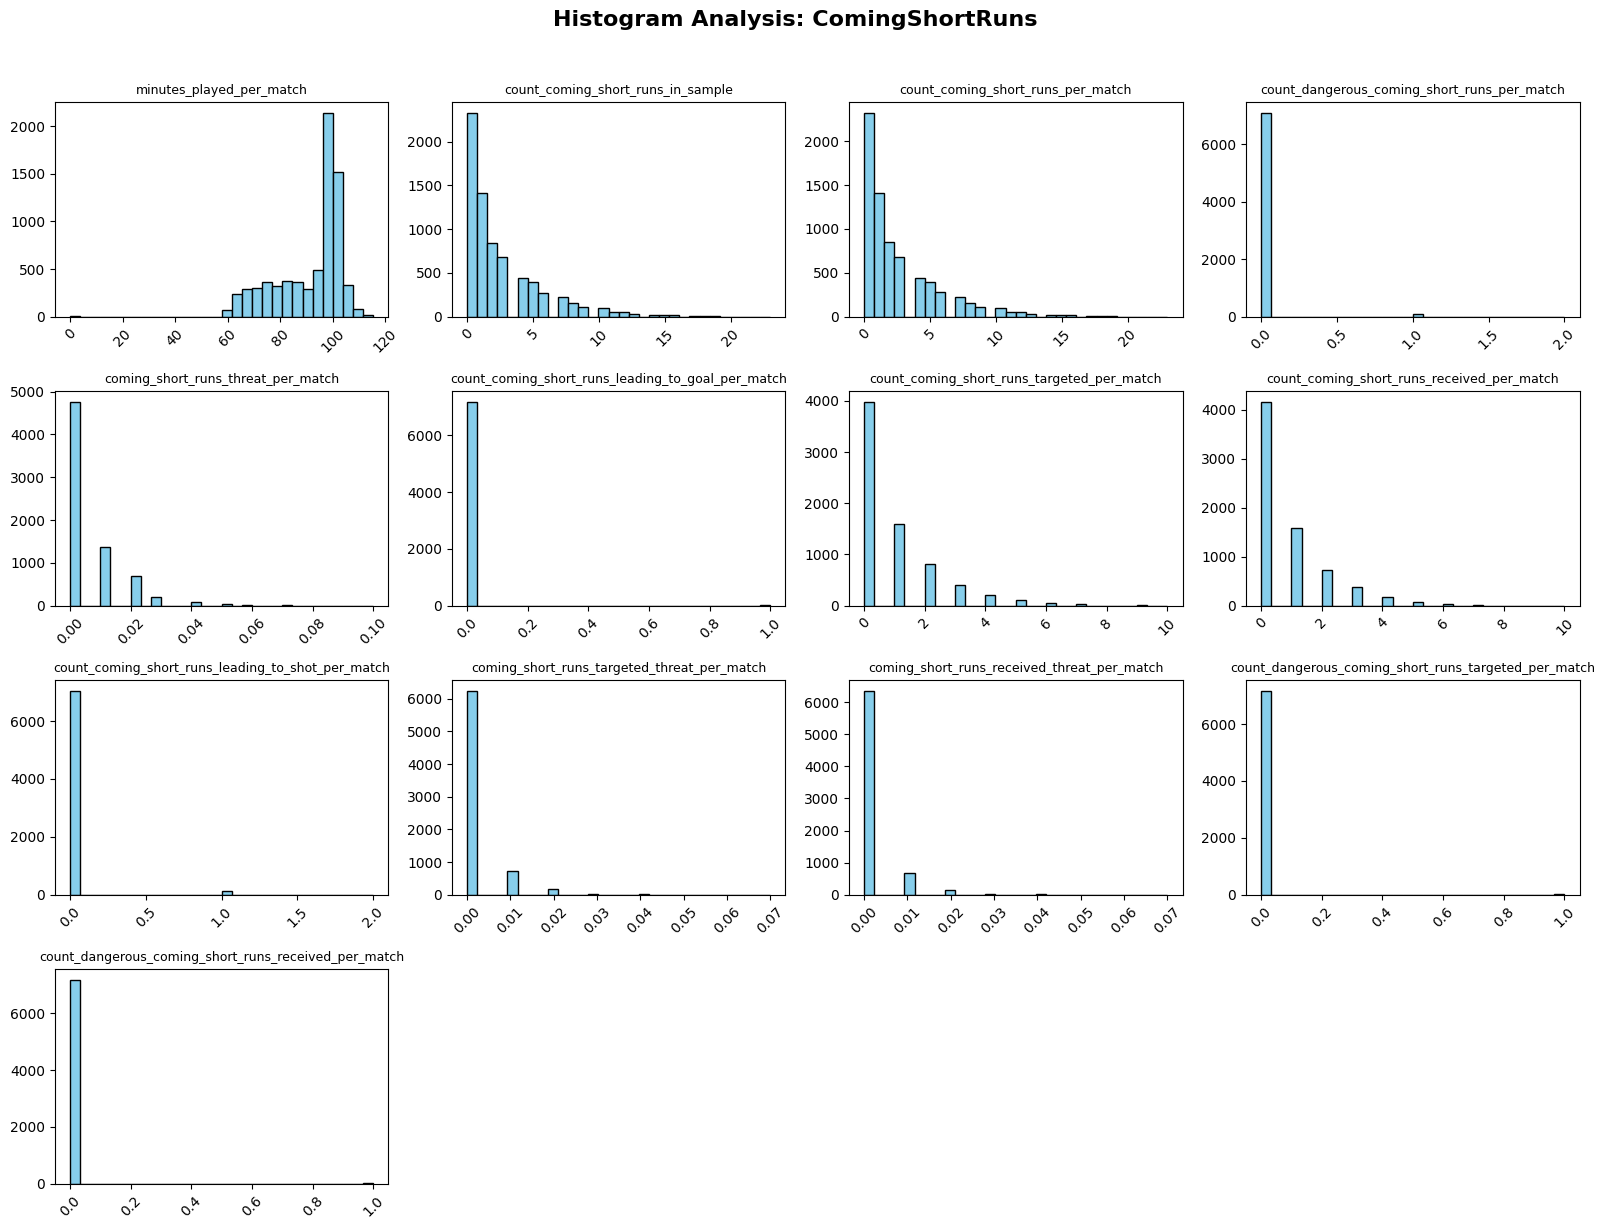

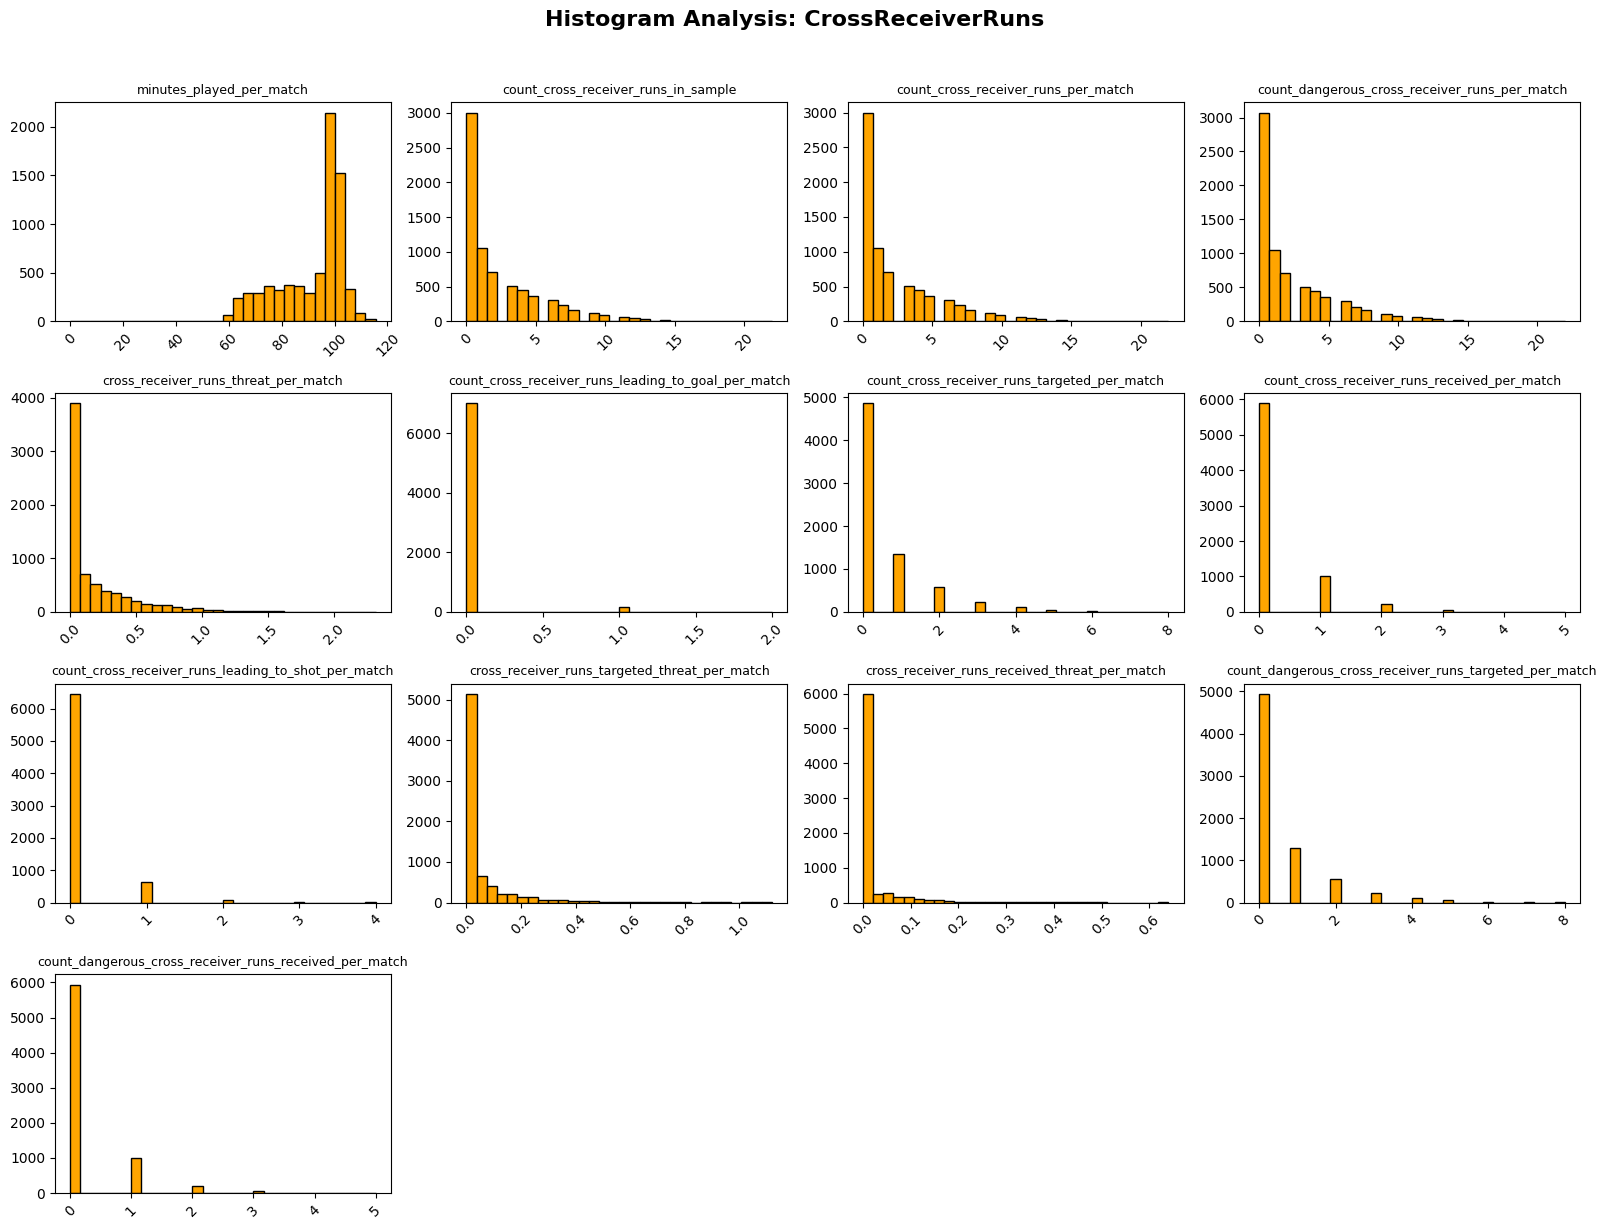

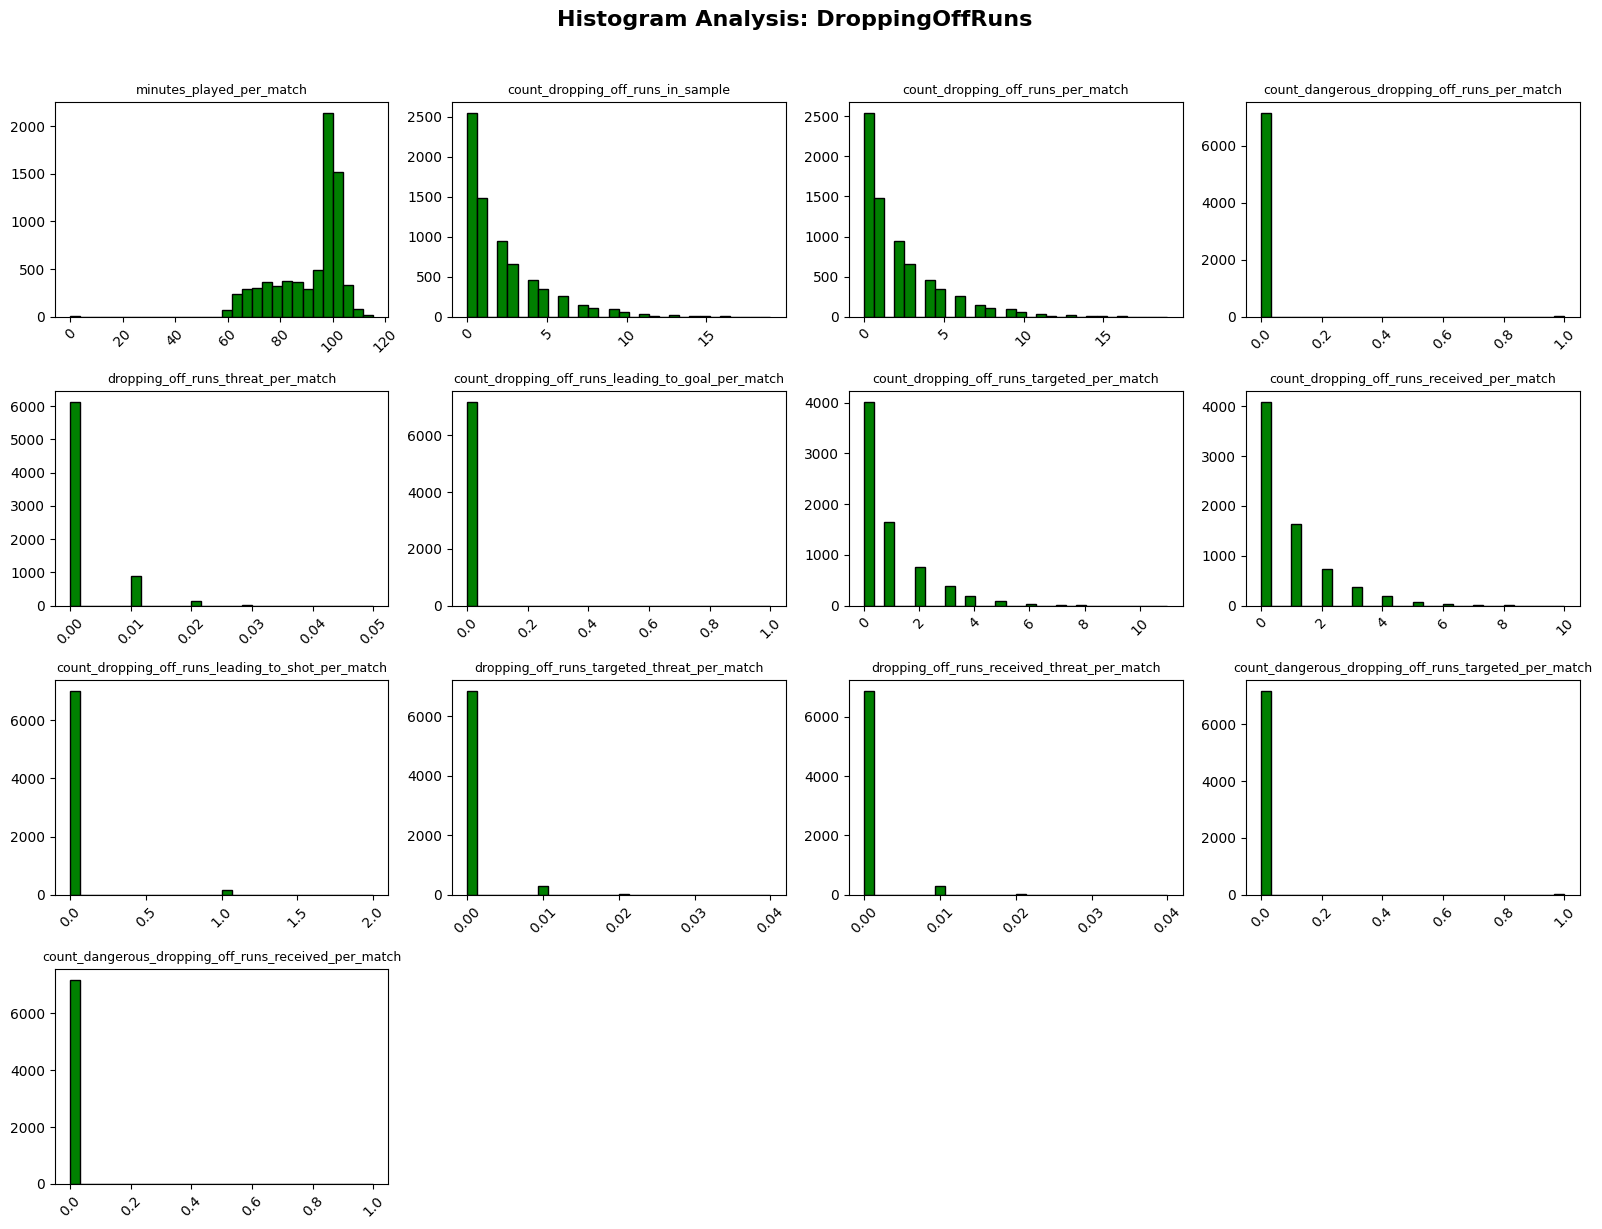

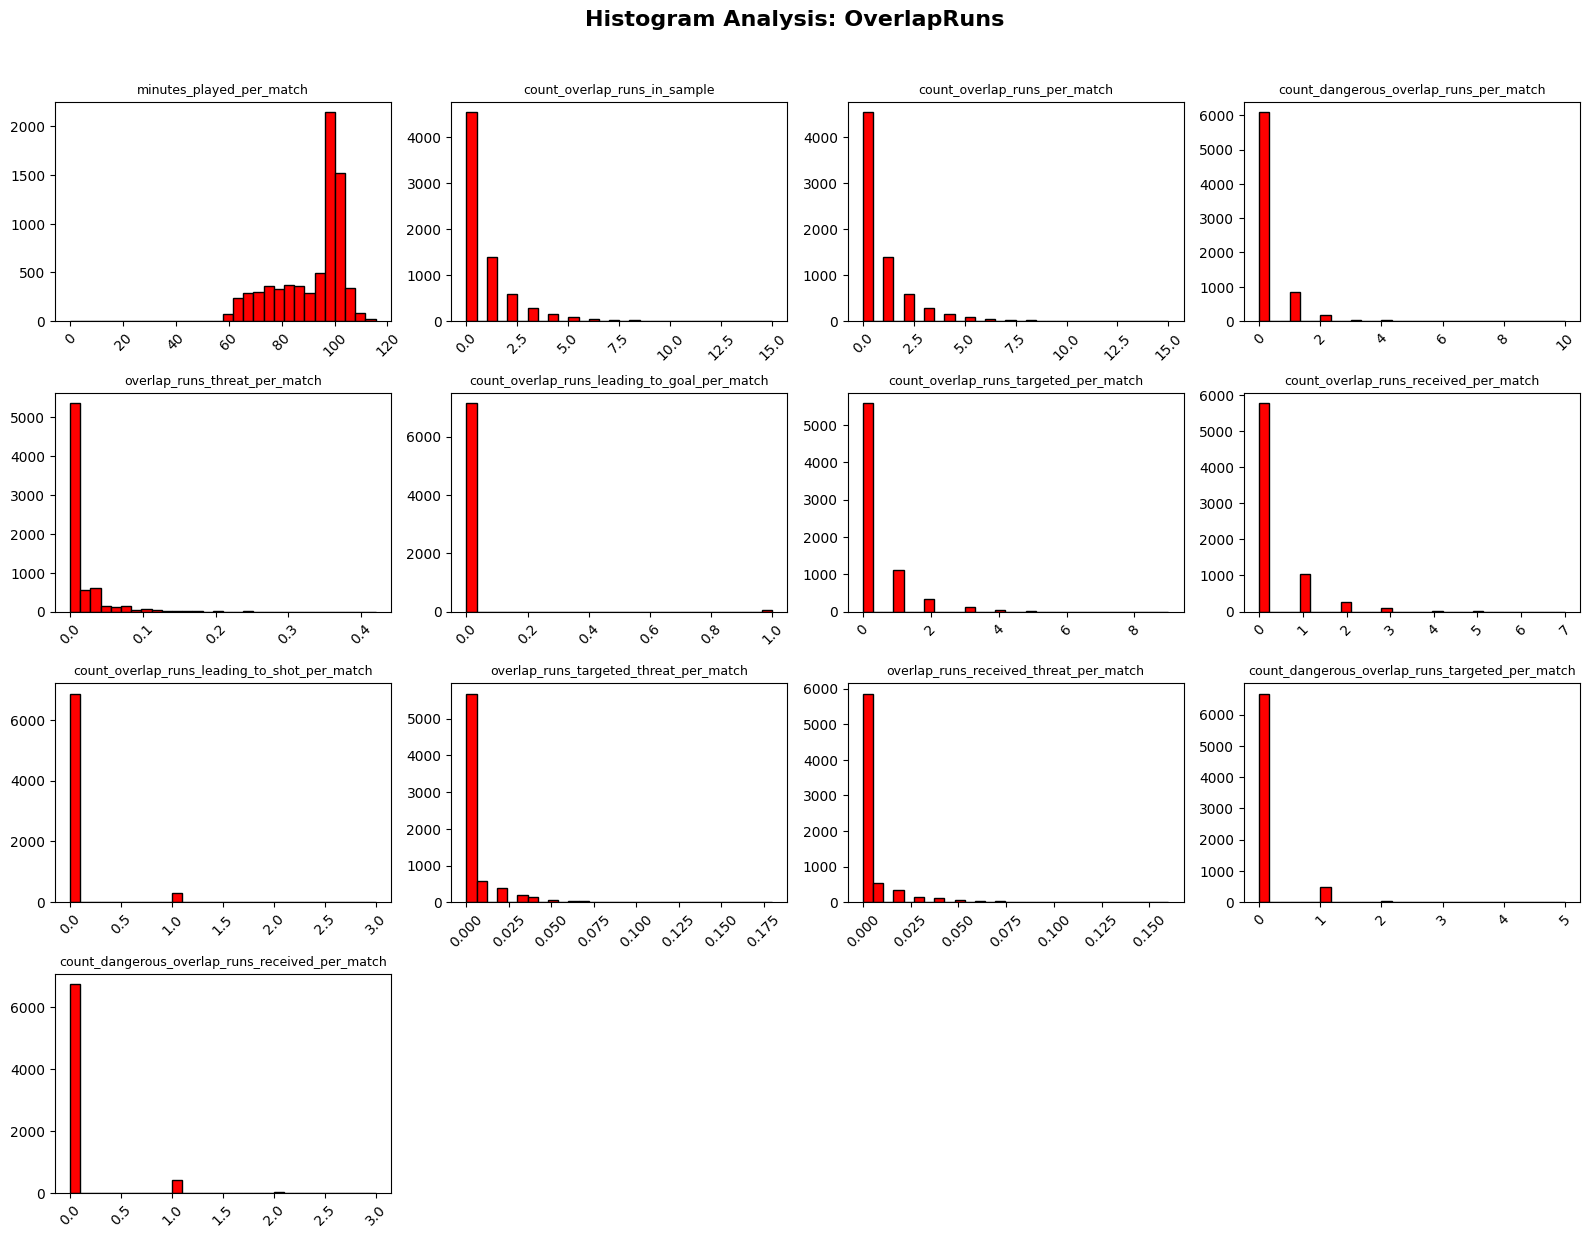

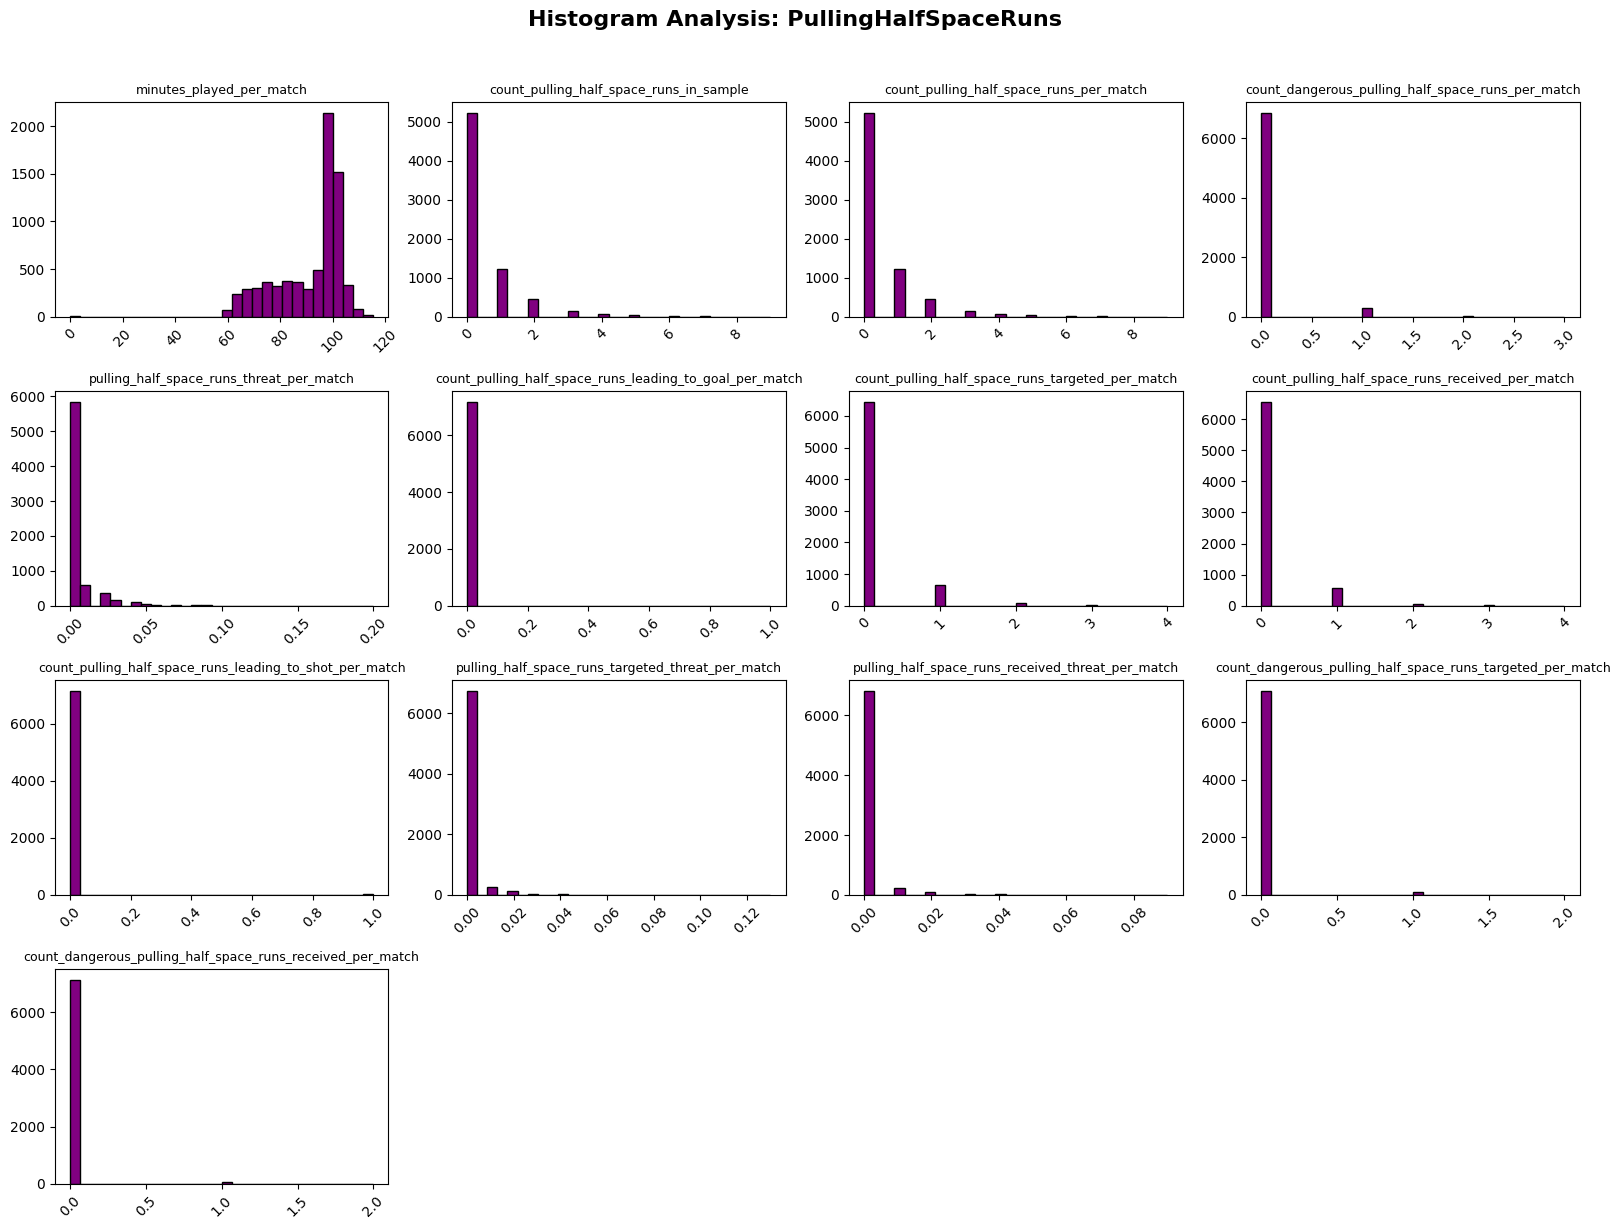

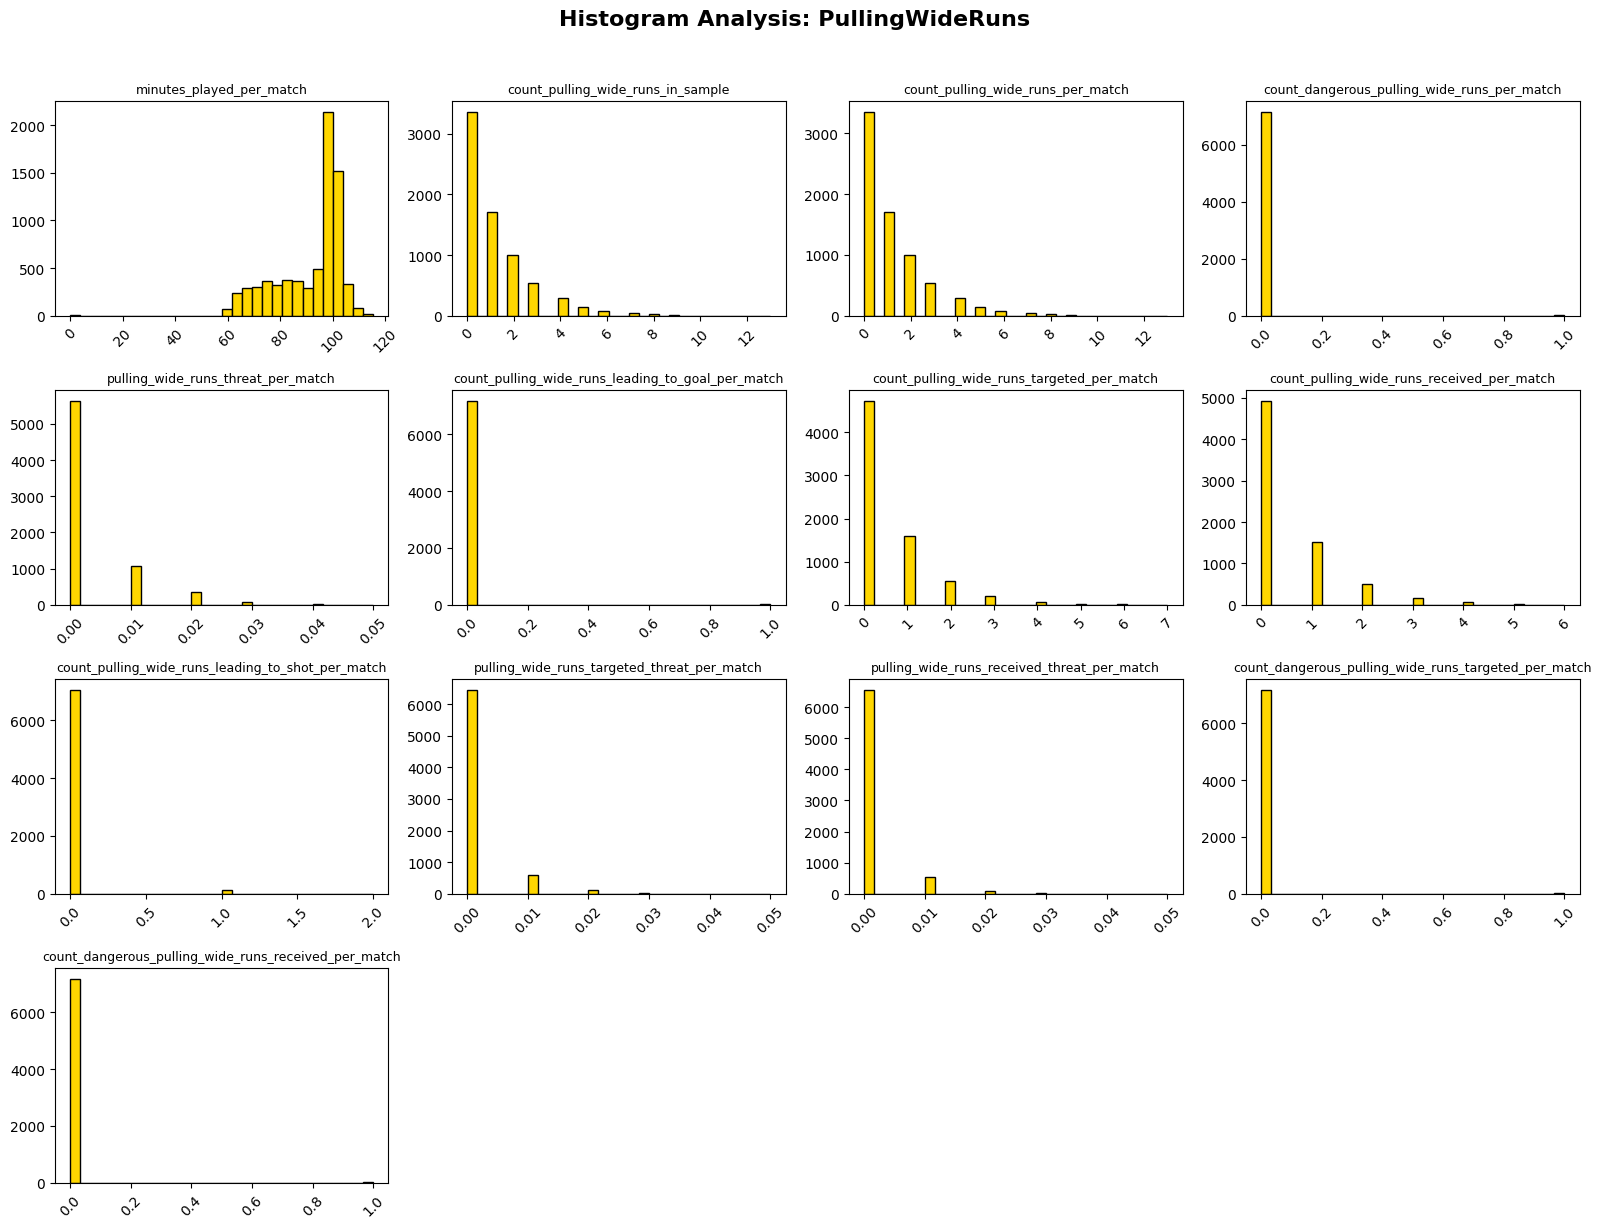

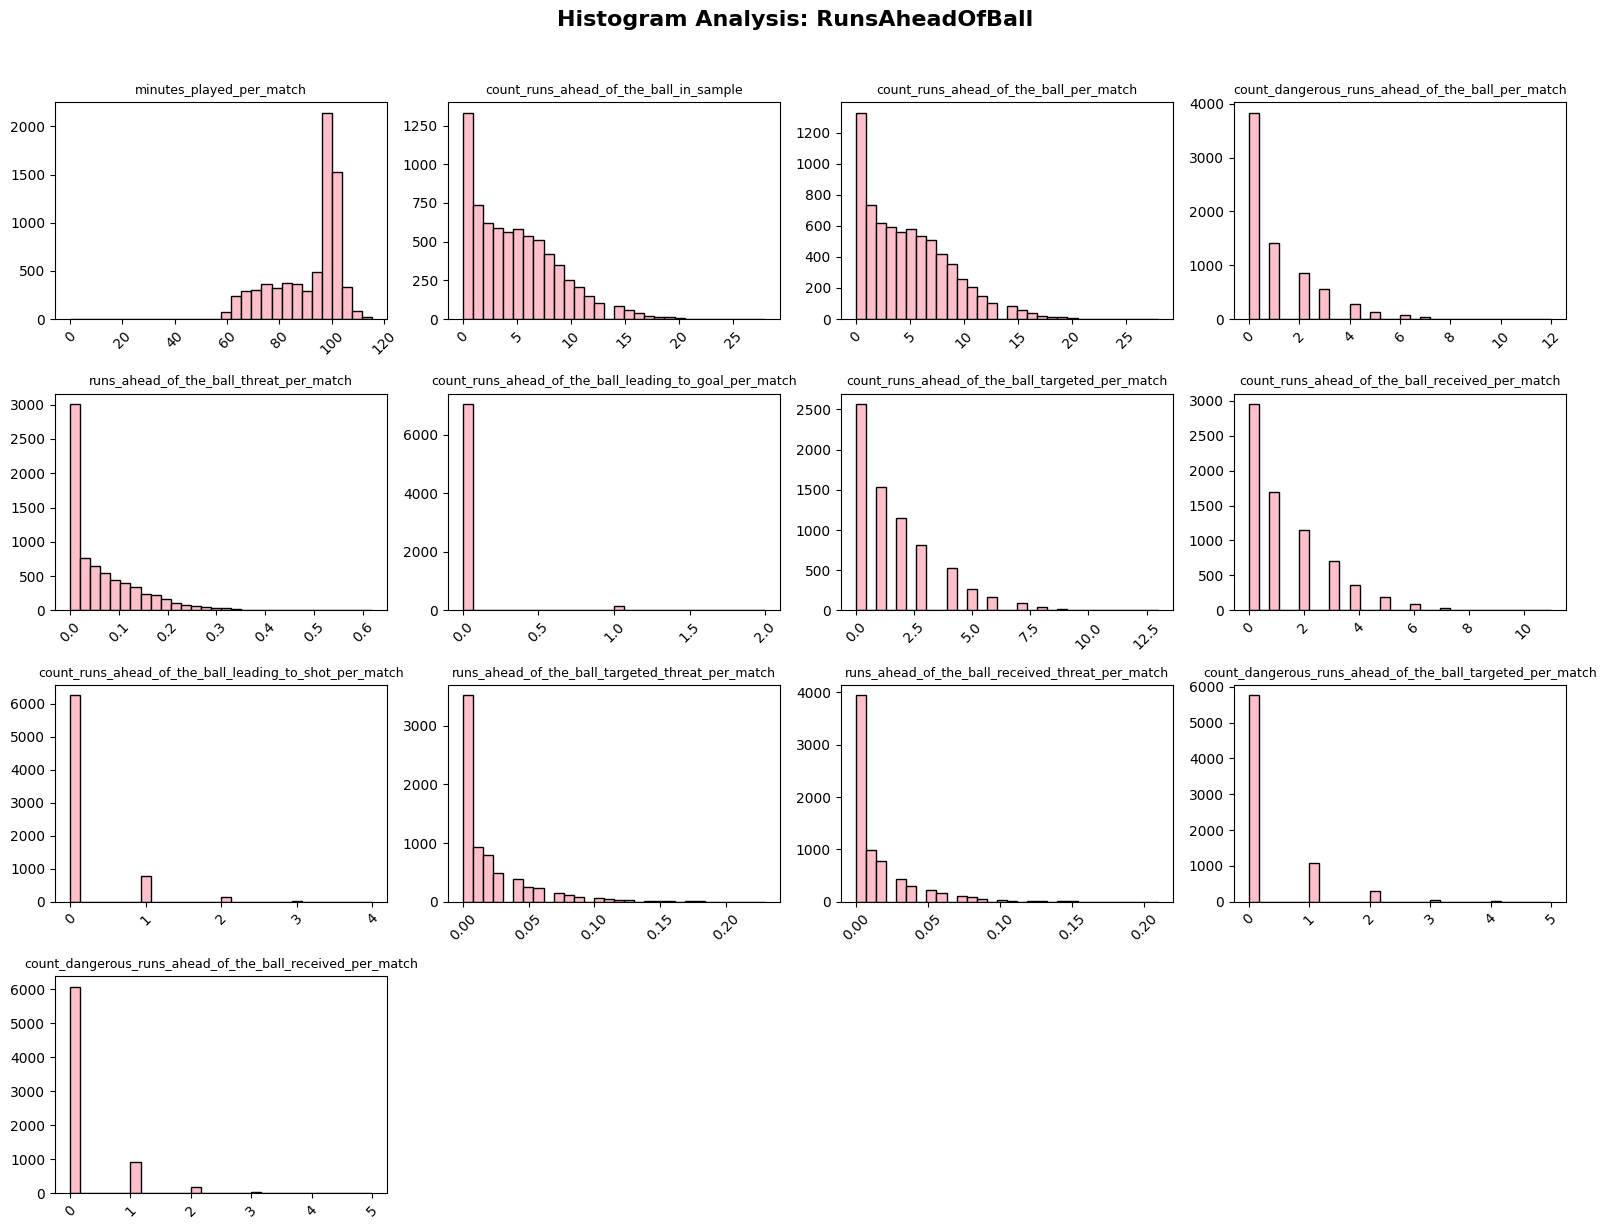

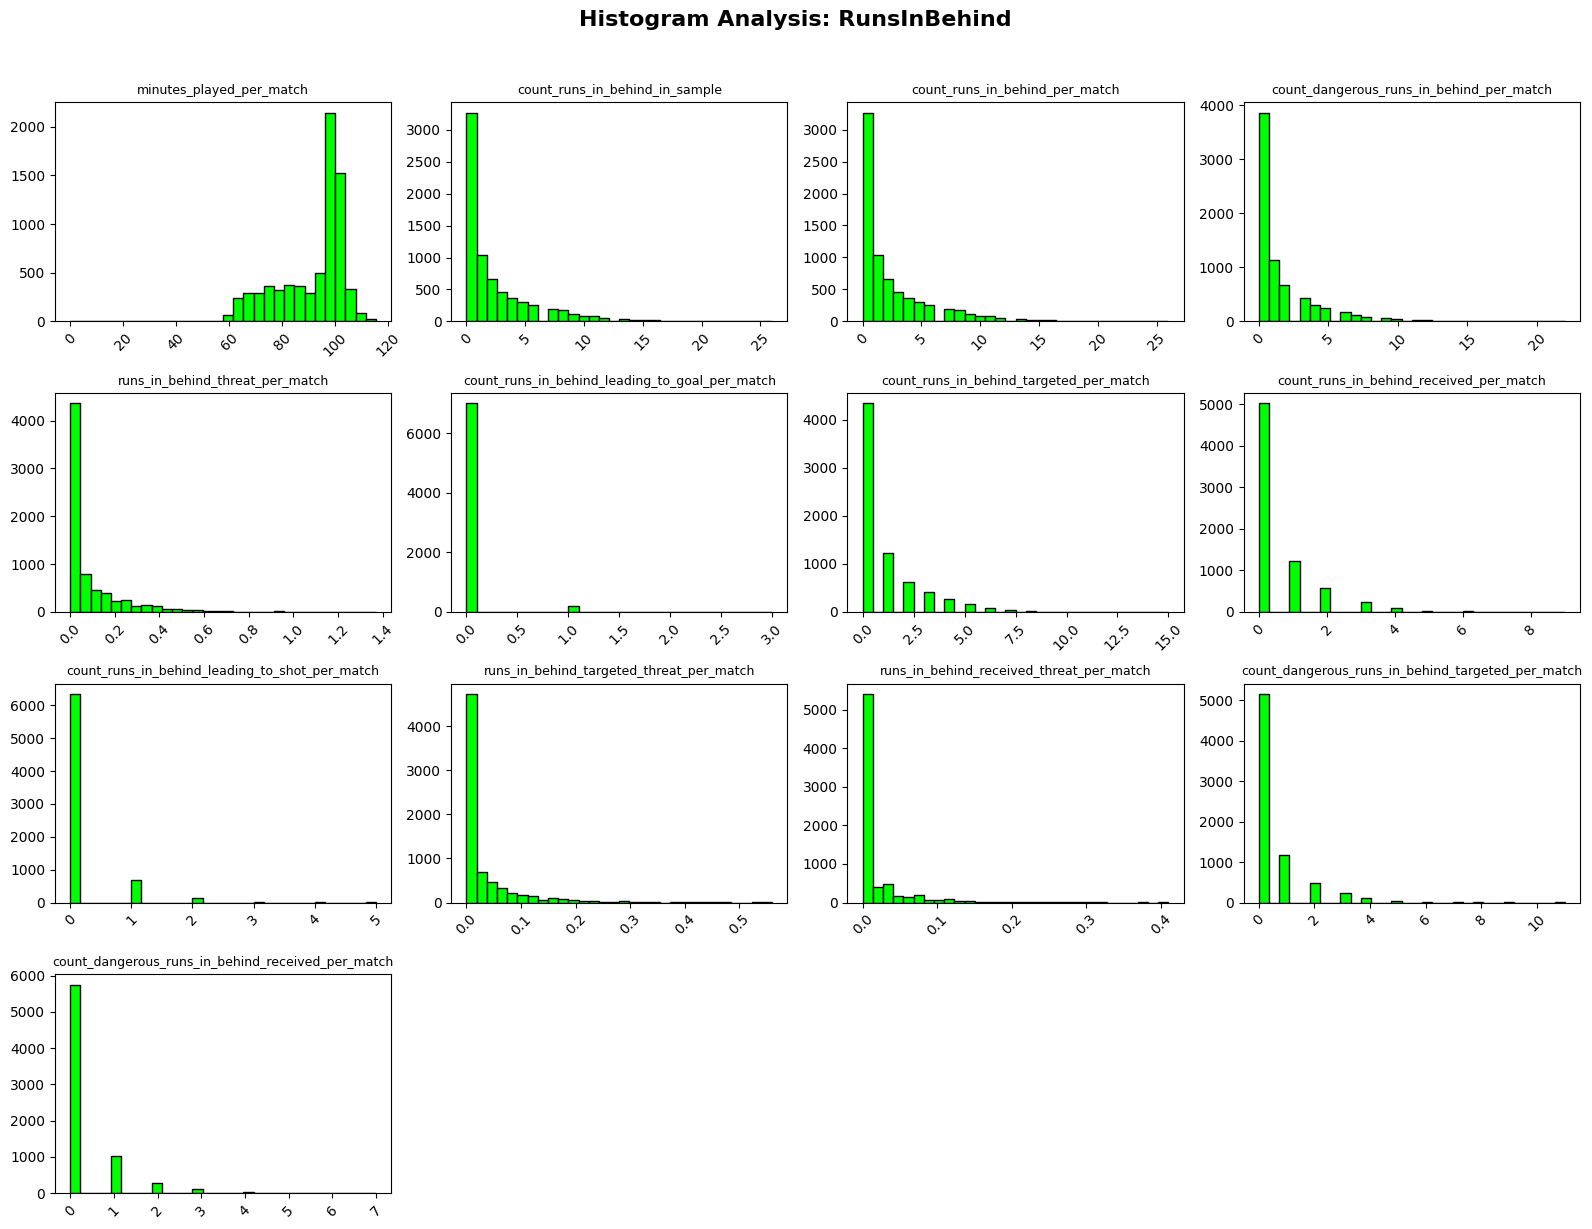

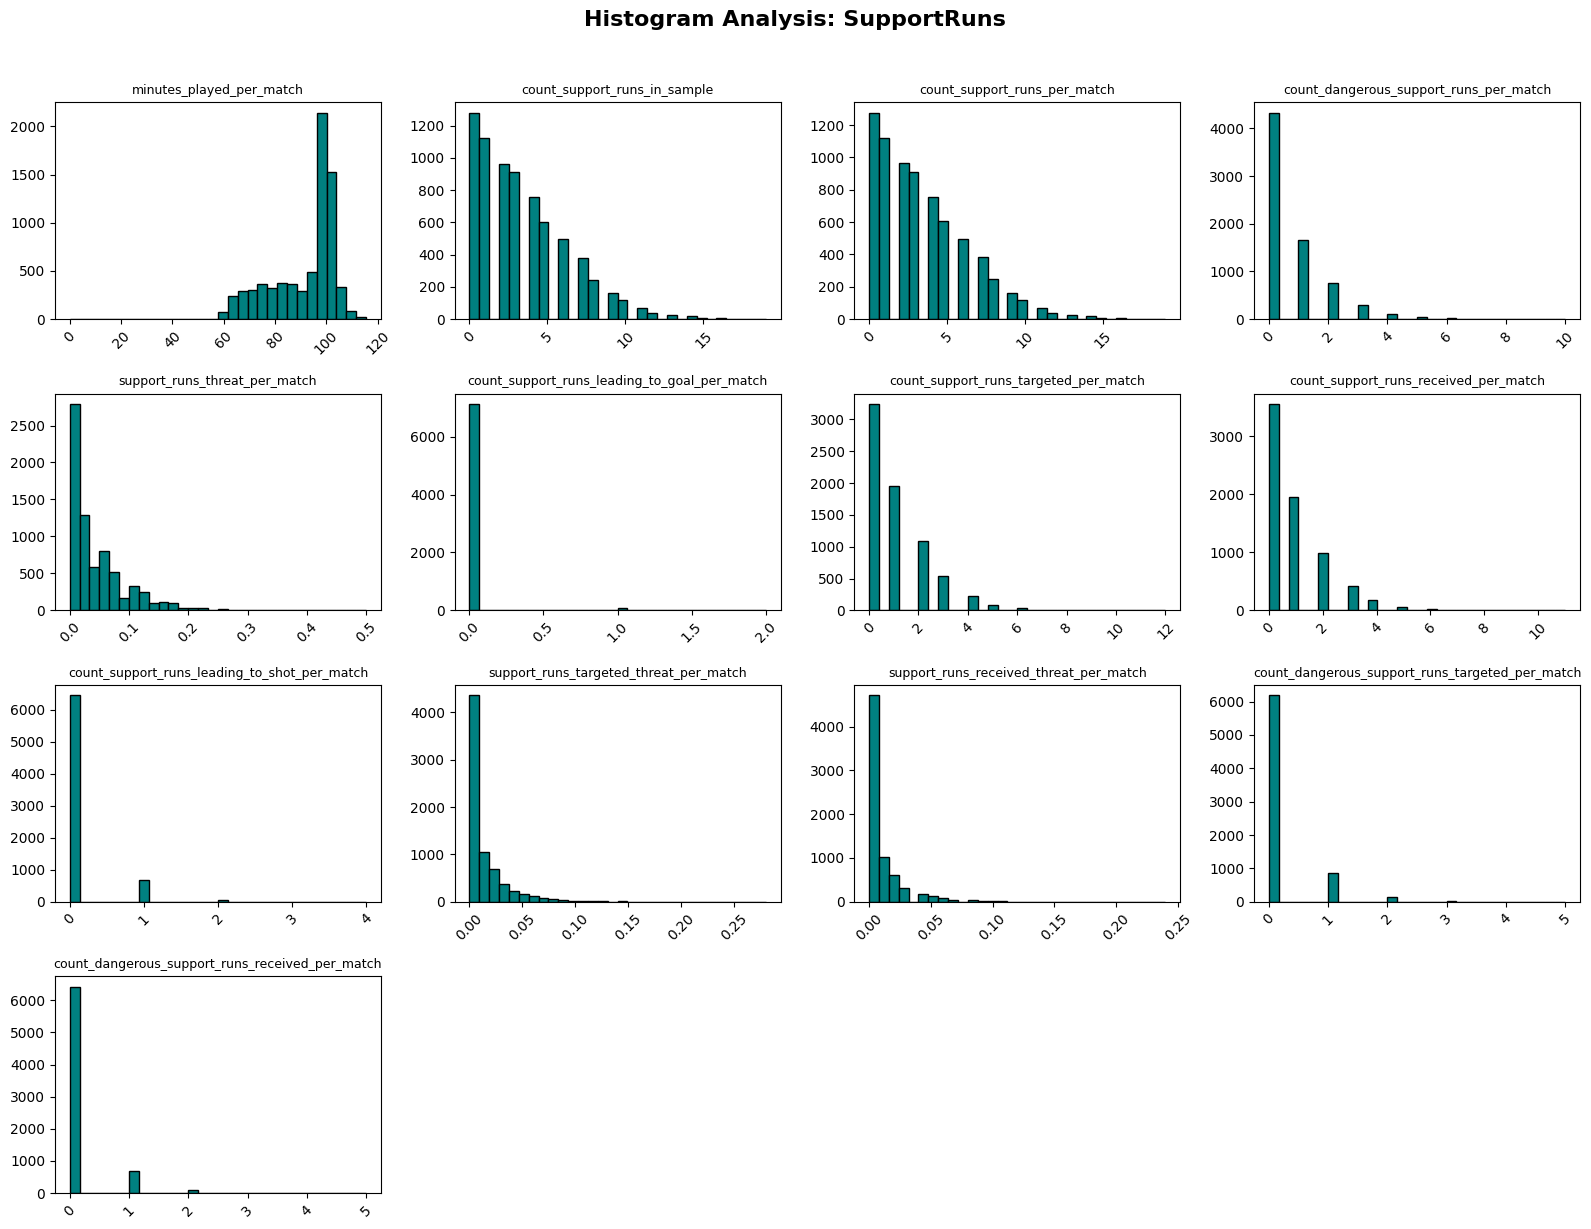

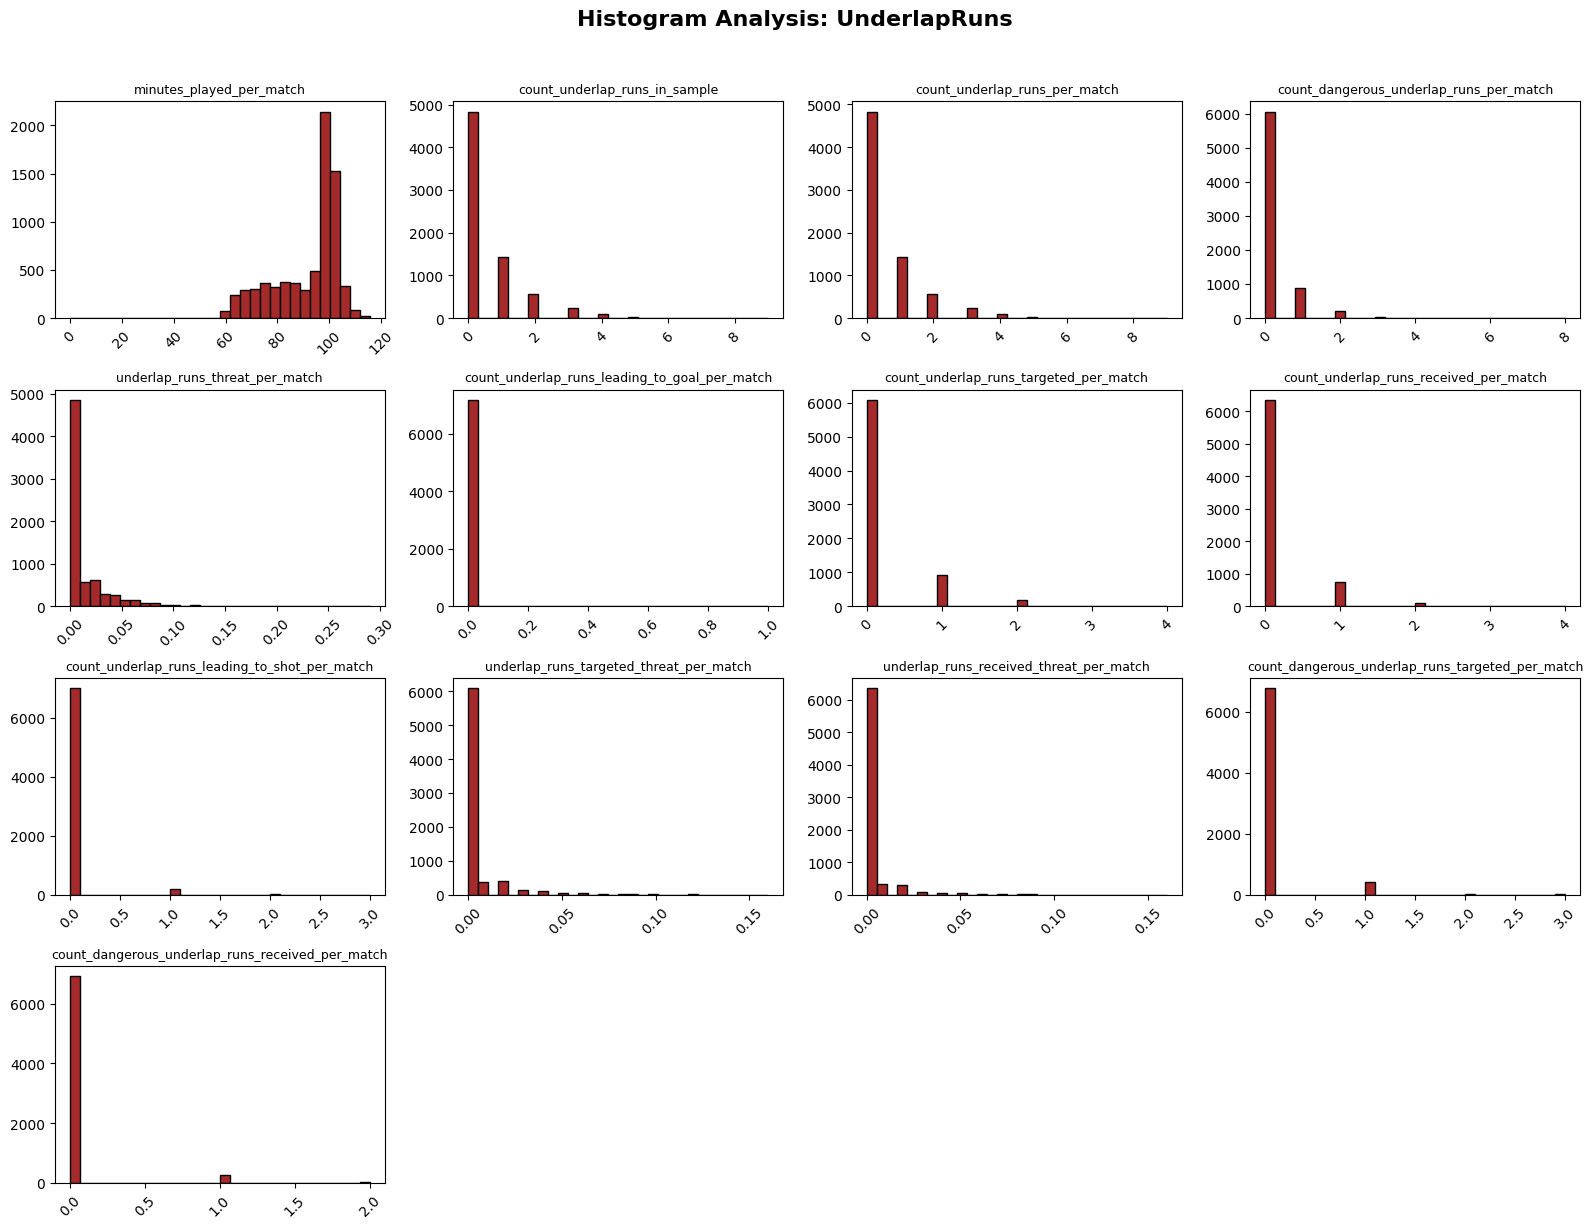

In [4]:

data_name_dic = {"ComingShortRuns": "coming_short_runs",
                 "CrossReceiverRuns": "cross_receiver_runs",
                 "DroppingOffRuns": "dropping_off_runs",
                 "OverlapRuns": "overlap_runs",
                 "PullingHalfSpaceRuns": "pulling_half_space_runs",
                 "PullingWideRuns": "pulling_wide_runs",
                 "RunsAheadOfBall": "runs_ahead_of_the_ball",
                 "RunsInBehind": "runs_in_behind",
                 "SupportRuns": "support_runs",
                 "UnderlapRuns": "underlap_runs",
                 }

def subplot_df(data_name, data_name_dic, color="skyblue"):
    df = pd.read_csv(f"2024.45/{data_name}.csv", sep=";", quotechar='"')
    df.columns = df.columns.str.strip()
    #print(df.columns)

    # Columns you want histograms for
    cols_to_plot = [
        'minutes_played_per_match',
        f'count_{data_name_dic[data_name]}_in_sample',
        f'count_{data_name_dic[data_name]}_per_match',
        f'count_dangerous_{data_name_dic[data_name]}_per_match',
        f'{data_name_dic[data_name]}_threat_per_match',
        f'count_{data_name_dic[data_name]}_leading_to_goal_per_match',
        f'count_{data_name_dic[data_name]}_targeted_per_match',
        f'count_{data_name_dic[data_name]}_received_per_match',
        f'count_{data_name_dic[data_name]}_leading_to_shot_per_match',
        f'{data_name_dic[data_name]}_targeted_threat_per_match',
        f'{data_name_dic[data_name]}_received_threat_per_match',
        f'count_dangerous_{data_name_dic[data_name]}_targeted_per_match',
        f'count_dangerous_{data_name_dic[data_name]}_received_per_match']


    # Convert selected columns to numeric
    df[cols_to_plot] = df[cols_to_plot].apply(pd.to_numeric, errors="coerce")

    # Create subplot grid
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
    axes = axes.flatten()

    for i, col in enumerate(cols_to_plot):
        axes[i].hist(df[col].dropna(), bins=30, edgecolor="black", color = color)
        axes[i].set_title(col, fontsize=9)
        axes[i].tick_params(axis='x', labelrotation=45)
        
    # Hide any unused subplots
    for j in range(len(cols_to_plot), len(axes)):
        fig.delaxes(axes[j])
    
    fig.suptitle(f"Histogram Analysis: {data_name}", fontsize=16, fontweight='bold', y=1.02)

    plt.tight_layout()
    plt.show()

# subplot_df("ComingShortRuns", data_name_dic)
# subplot_df("CrossReceiverRuns",data_name_dic)
# subplot_df("DroppingOffRuns",data_name_dic)
# subplot_df("OverlapRuns",data_name_dic)
# subplot_df("PullingHalfSpaceRuns",data_name_dic)
# subplot_df("PullingWideRuns",data_name_dic)
# subplot_df("RunsAheadOfBall",data_name_dic)
# subplot_df("RunsInBehind",data_name_dic)
# subplot_df("SupportRuns",data_name_dic)
# subplot_df("UnderlapRuns",data_name_dic)

colors = [
    "skyblue", "orange", "green", "red", "purple", "gold",
    "pink", "lime", "teal", "brown"
]

# Loop through each dataset and color
for (name, _), color in zip(data_name_dic.items(), colors):
    subplot_df(name, data_name_dic, color=color)



In [4]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from itertools import cycle

# -------- LaTeX setup (once) --------
def enable_latex_or_fallback():
    """Enable LaTeX text rendering if latex + dvipng/gs are available, else fallback."""
    has_latex = shutil.which("latex") is not None
    has_dvipng = shutil.which("dvipng") is not None
    has_gs = shutil.which("gs") is not None  # ghostscript

    use_tex = has_latex and (has_dvipng or has_gs)
    plt.rcParams.update({
        "text.usetex": use_tex,
        "font.family": "serif",
        # Use LaTeX-looking fonts either way
        "mathtext.fontset": "cm",
        "axes.labelsize": 14,
        "axes.titlesize": 16,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "figure.dpi": 120,
        "savefig.dpi": 200,
    })

    # Optional preamble: comment out if packages aren’t installed in TeX
    if use_tex:
        plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{siunitx}"

enable_latex_or_fallback()

# -------- helpers --------
def latex_escape(text: str) -> str:
    """Escape LaTeX special chars for text mode."""
    # Minimal set for labels/titles
    repl = {
        "\\": r"\textbackslash{}",
        "_": r"\_",
        "%": r"\%",
        "&": r"\&",
        "#": r"\#",
        "$": r"\$",
        "{": r"\{",
        "}": r"\}",
        "~": r"\textasciitilde{}",
        "^": r"\textasciicircum{}",
    }
    for k, v in repl.items():
        text = text.replace(k, v)
    return text

# Your mapping (no ".csv" in the keys)
data_name_dic = {
    "ComingShortRuns": "coming_short_runs",
    "CrossReceiverRuns": "count_cross_receiver",
    "DroppingOffRuns": "dropping_off_runs",
    "OverlapRuns": "overlap_runs",
    "PullingHalfSpaceRuns": "pulling_half_space_runs",
    "PullingWideRuns": "pulling_wide_runs",
    "RunsAheadOfBall": "runs_ahead_of_ball",
    "RunsInBehind": "runs_in_behind",
    "SupportRuns": "support_runs",
    "UnderlapRuns": "underlap_runs",
}

DATA_DIR = Path("2024.45")  # change if needed

def load_df(data_name: str) -> pd.DataFrame:
    """Load a semicolon CSV with quotes, strip columns and string whitespace."""
    key = data_name.replace(".csv", "")
    csv_path = DATA_DIR / f"{key}.csv"
    df = pd.read_csv(csv_path, sep=";", quotechar='"')
    df.columns = df.columns.str.strip()
    df = df.apply(lambda c: c.str.strip() if c.dtype == "object" else c)
    return df, key

def plot_top_players_for_file(
    data_name: str,
    column: str,
    top_n: int = 30,
    color: str = "skyblue",
    filter_quality_passed: bool = False,
    save_path: str | None = None
):
    """
    Plot top N players by mean of `column` for a single file, with LaTeX text if available.
    """
    df, key = load_df(data_name)

    if filter_quality_passed and "quality_check" in df.columns:
        df = df[df["quality_check"] == "Passed"]

    if column not in df.columns:
        raise KeyError(
            f"Column '{column}' not found in {key}.csv. "
            f"Available columns include:\n{list(df.columns)}"
        )

    df[column] = pd.to_numeric(df[column], errors="coerce")

    mean_values = (
        df.groupby("player_name")[column]
        .mean()
        .dropna()
        .sort_values(ascending=False)
        .head(top_n)
    )

    # Labels/titles with LaTeX-friendly text
    col_label_tex = latex_escape(column.replace("_", " "))
    file_label_tex = latex_escape(f"{key}.csv")

    plt.figure(figsize=(12, 6))
    mean_values.plot(kind="bar", color=color, edgecolor="black")

    # If usetex is on, we can sprinkle in a bit of LaTeX styling
    if plt.rcParams.get("text.usetex", False):
        plt.ylabel(rf"\textbf{{Mean}} {col_label_tex}")
        plt.xlabel(r"\textbf{Player Name}")
        plt.title(rf"Top {top_n} Players --- Mean {col_label_tex} ({file_label_tex})", pad=12)
    else:
        plt.ylabel(f"Mean {column}")
        plt.xlabel("Player Name")
        plt.title(f"Top {top_n} Players — Mean {column} ({key}.csv)", pad=12)

    plt.xticks(rotation=75, ha="right")
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, bbox_inches="tight")
        plt.close()
    else:
        plt.show()

def plot_top_players_for_all_files(
    column: str,
    top_n: int = 30,
    colors: list[str] | None = None,
    filter_quality_passed: bool = False,
    save_dir: str | None = None
):
    """
    Loop over every file in data_name_dic and plot/save the top N players.
    """
    file_names = list(data_name_dic.keys())

    if colors is None:
        colors = ["skyblue", "orange", "green", "red", "purple", "gold",
                  "pink", "lime", "teal", "brown"]
    color_cycle = cycle(colors)

    save_dir_path = None
    if save_dir:
        save_dir_path = Path(save_dir)
        save_dir_path.mkdir(parents=True, exist_ok=True)

    for name in file_names:
        color = next(color_cycle)
        save_path = None
        if save_dir_path:
            save_path = str(save_dir_path / f"{name}_top{top_n}_{column}.pdf")  # vector PDF
        try:
            plot_top_players_for_file(
                data_name=name,
                column=column,
                top_n=top_n,
                color=color,
                filter_quality_passed=filter_quality_passed,
                save_path=save_path,
            )
            if save_path:
                print(f"Saved: {save_path}")
        except KeyError as e:
            print(f"[SKIP] {name}.csv — {e}")



In [6]:
data_name_dic = {
    "ComingShortRuns": "coming_short_runs",
    "CrossReceiverRuns": "_cross_receiver_runs",
    "DroppingOffRuns": "dropping_off_runs",
    "OverlapRuns": "overlap_runs",
    "PullingHalfSpaceRuns": "pulling_half_space_runs",
    "PullingWideRuns": "pulling_wide_runs",
    "RunsAheadOfBall": "runs_ahead_of_ball",
    "RunsInBehind": "runs_in_behind",
    "SupportRuns": "support_runs",
    "UnderlapRuns": "underlap_runs",
}



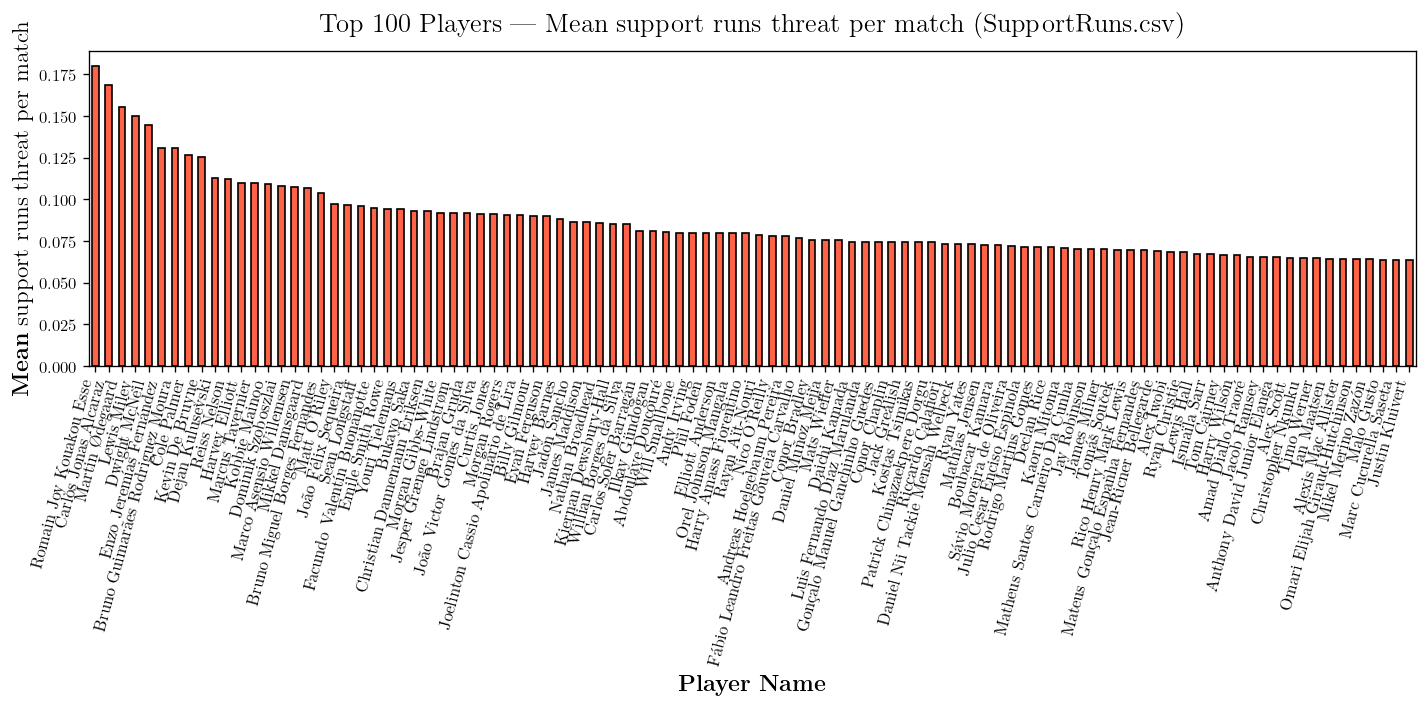

In [13]:
plot_top_players_for_file("SupportRuns", "support_runs_threat_per_match", top_n=100, color="tomato")
plot_top_players_for_all_files()

In [9]:
import shutil

print("latex found at:", shutil.which("latex"))
print("dvipng found at:", shutil.which("dvipng"))
print("ghostscript found at:", shutil.which("gs"))

latex found at: None
dvipng found at: None
ghostscript found at: /opt/homebrew/bin/gs


In [2]:
import os, shutil
print(os.environ["PATH"])
print("latex found at:", shutil.which("latex"))
print("dvipng found at:", shutil.which("dvipng"))

/Users/charliestamp/opt/anaconda3/envs/env/bin:/Library/TeX/texbin:/Library/TeX/texbin:/Users/charliestamp/opt/anaconda3/envs/env/bin:/Users/charliestamp/opt/anaconda3/condabin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/Library/TeX/texbin
latex found at: /Library/TeX/texbin/latex
dvipng found at: /Library/TeX/texbin/dvipng


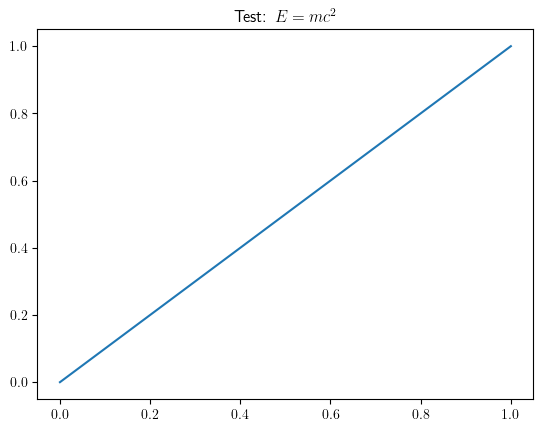

In [3]:

import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True
plt.plot([0,1],[0,1])
plt.title(r"Test: $E = mc^2$")
plt.show()